In [43]:
import cv2
import numpy as np

img = cv2.imread('./image/coin.jpg')
img = cv2.resize(img, dsize=(0,0), fx=0.3, fy=0.3, interpolation=cv2.INTER_LINEAR)
img_copy = img.copy()
img_g = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

img_g_blur = cv2.GaussianBlur(img_g, (7,7), 0)
img_thresh = cv2.adaptiveThreshold(img_g_blur, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                   cv2.THRESH_BINARY_INV, 45, 9)
#kernel_erosion = np.ones((2,2), np.uint8)
#img_erosion = cv2.erode(img_thresh, kernel_erosion, iterations=1)
#img_dilation = cv2.dilate(img_erosion, kernel_erosion, iterations=1)
cv2.imshow('', np.hstack([img_g, img_g_blur, img_thresh]))
cv2.waitKey()
cv2.destroyAllWindows()

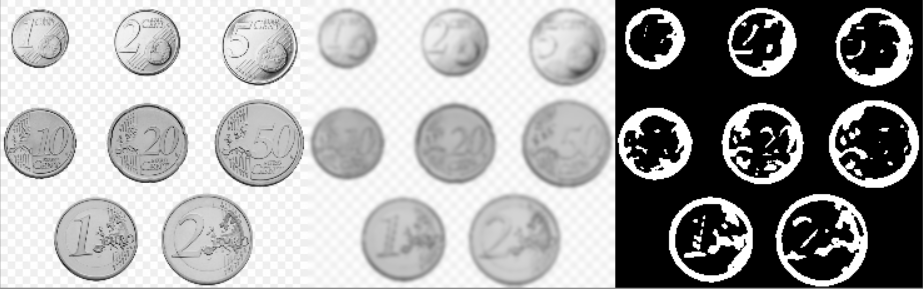

- 일단 모폴로지한 동전들의 구멍을 메우자

In [44]:
kernel = np.ones((5,5), np.uint8)
closing = cv2.morphologyEx(img_thresh, cv2.MORPH_CLOSE, kernel, iterations=2)
cv2.imshow('', np.hstack([img_thresh, closing]))
cv2.waitKey()
cv2.destroyAllWindows()

- 이미지에 contours 적용

In [45]:
cont_img = closing.copy()
contours, _ =cv2.findContours(cont_img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

for cnt in contours: 
    area = cv2.contourArea(cnt)
    # if area < 1000 or area > 7000 : continue   # 객체 크기 범위 (작게하면 작은 건 안잡힘)
    if len(cnt) < 3 : continue  # 원형 형태를 잡을 때 5개 이하는 원이 아님
    
    ellipse = cv2.fitEllipse(cnt)   #이걸로 포인트 들을 받아서 원을 그리는 것임
    cv2.ellipse(img_copy, ellipse, (255, 0, 0), 2)
    
cv2.imshow('img_thresh', img_thresh)
cv2.imshow('cont_img', cont_img)
cv2.imshow('img_copy with contours', img_copy)
cv2.waitKey(0)
cv2.destroyAllWindows()